# Watch Company List

To get company share price rising point,
shape of price movement must be checked

1. Get tickers list and store it in a list
2. Get one "ohlc + v" data of a company .
3. Make Bollinger Band series
4. Mark bollinger band breaking point
5. Draw graph
6. Save as image

In [2]:
from src.CompanyImporter import import_all_company_tickers
tickers = import_all_company_tickers()

tickers.pop(tickers.size - 1) # remove last null data
tickers

0      ASTS
1      INVZ
2       FOA
3      PSFE
4      ARVL
       ... 
146     APP
147     GLG
148     JAZ
149    JMBA
150    NHRX
Name: Post-SPAC Ticker Symbol, Length: 151, dtype: object

In [3]:
# Price data omit some prices before merge prices
from src.PriceImporter import get_prices

test_price = get_prices('APP')
test_price.size


0

In [4]:
import json
# Price data omit some before merge so remain only proper data

all_companies_prices = {}
omitted_companies = []
avalilable_companies = []
for ticker in tickers:
    prices = get_prices(ticker)

    if prices.size > 0:
        all_companies_prices[ticker] = prices
        avalilable_companies.append(ticker)
    else:
        omitted_companies.append(ticker)

# with open('../data/available_company.json', 'w') as f:
#     f.write(json.dumps(avalilable_companies))

print(all_companies_prices.keys())
print(omitted_companies)

dict_keys(['ASTS', 'INVZ', 'FOA', 'PSFE', 'ARVL', 'NVVE', 'PCT', 'AEVA', 'OUST', 'VIEW', 'CHPT', 'BFLY', 'NUVB', 'PLBY', 'MILE', 'GMTX', 'ETWO', 'ADN', 'APPH', 'UWMC', 'LOTZ', 'HIMS', 'BTRS', 'CLOV', 'LSEA', 'BMTX', 'CLNN', 'RMO', 'DNMR', 'GNOG', 'RSI', 'VINC', 'PRCH', 'ARKO', 'ASLE', 'XL', 'GOEV', 'OPEN', 'BFI', 'SKLZ', 'RVPH', 'DM', 'LAZR', 'QS', 'UK', 'MP', 'GCMG', 'EOSE', 'TRIT', 'ATNF', 'TLMD', 'FSR', 'ADV', 'CERE', 'RIDE', 'PAYA', 'TTCF', 'CURI', 'SFT', 'MPLN', 'HYLN', 'EQOS', 'VLDR', 'GB', 'UTZ', 'HPK', 'DMS', 'IMTX', 'HOFV', 'FREE', 'LGHL', 'LPRO', 'NKLA', 'HYMC', 'SJ', 'DKNG', 'AVCT', 'IGIC', 'BWMX', 'GDYN', 'METX', 'ATCX', 'ALTG', 'GSMG', 'PAE', 'VRT', 'VVNT', 'BROG', 'IMVT', 'NFH', 'KLR', 'ACEL', 'AHCO', 'PHGE', 'SPCE', 'DMTK', 'AESE', 'CTOS', 'RPAY', 'KERN', 'XYNO', 'CLVT', 'KXIN', 'OSW', 'TH', 'BIOX', 'PACK', 'VRRM', 'FLMN', 'MGY', 'IMXI', 'CVON'])
['LBPS', 'CLVR', 'HTOO', 'ID', 'KLDI', 'BRMK', 'SONG', 'HUNTF', 'PECK', 'GTYH', 'AGLY', 'WTRH', 'NRCG', 'LAZY', 'AMR', 'PRPL',

## Result of analysis

In 151 companies the 39 companies are omitted in Yahoo Finance data.
So the analysis will be conducted for 112 companies.

The list of companies possible to get prices is saved in `data/avaliable_companies.json`

## draw Bollinger Band

Before the implementation of graph drawing module,
test operation of Graph drawer

In [5]:
company_ticker = 'OUST'

df = get_prices(company_ticker)
df['MA20'] = df['close'].rolling(window=20).mean()

df.tail()

,code,date,open,high,low,close,volume,MA20
98,OUST,2021-03-04,11.86,11.99,10.55,11.38,2387400,13.9355
99,OUST,2021-03-05,11.20,12.25,10.11,12.03,1947700,13.8380
100,OUST,2021-03-08,11.99,12.12,10.31,10.47,2171200,13.6520
101,OUST,2021-03-09,10.69,11.19,10.62,10.70,881000,13.4860
102,OUST,2021-03-10,10.70,10.85,10.08,10.35,1721100,13.2380


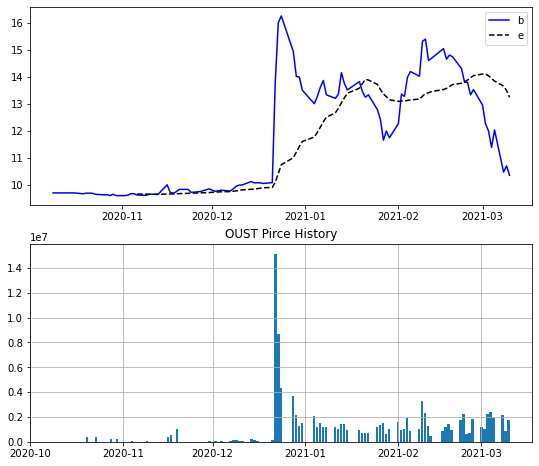

In [6]:
# Test drawing Bollinger Band
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 8))
plt.subplot(2,1,1)
plt.plot(df['date'], df['close'], 'b', label='Close')
plt.plot(df['date'], df['MA20'], 'k--', label='MA20')
plt.legend('best')

plt.subplot(2,1,2)
plt.bar(df['date'], df['volume'])
plt.title(f'{company_ticker} Pirce History')

plt.grid(True)
plt.show()

In [7]:
# Make function to draw

def save_price_volume_movement_figure_img(history, company, file_path):
    df = history
    df['MA20'] = df['close'].rolling(window=20).mean()

    plt.figure(figsize=(9, 8))
    plt.subplot(2,1,1)
    plt.plot(df['date'], df['close'], 'b', label='Close')
    plt.plot(df['date'], df['MA20'], 'k--', label='MA20')
    plt.legend('best')

    plt.subplot(2,1,2)
    plt.bar(df['date'], df['volume'])
    plt.title(f'{company} Pirce History')

    plt.grid(True)
    plt.savefig(file_path)
    plt.close()

In [8]:
# extract to image

for ticker in all_companies_prices:
    price_history = get_prices(ticker)
    ipo_date = price_history.date[0]
    save_path = f'../data/figures/[{ipo_date}]{ticker}.jpg'
    save_price_volume_movement_figure_img(price_history, ticker, save_path)
